In [1]:
# import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

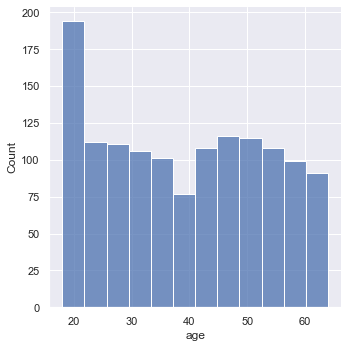

In [8]:
# Data Distribution for Numarical column -Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['age'])
plt.show()

In [9]:
data['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

<Figure size 432x432 with 0 Axes>

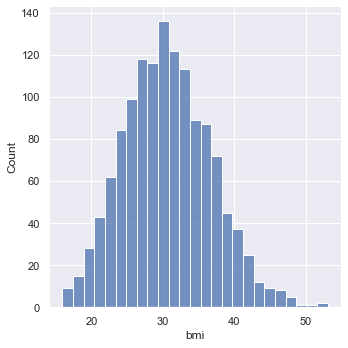

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['bmi'])
plt.show()

In [11]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<Figure size 432x432 with 0 Axes>

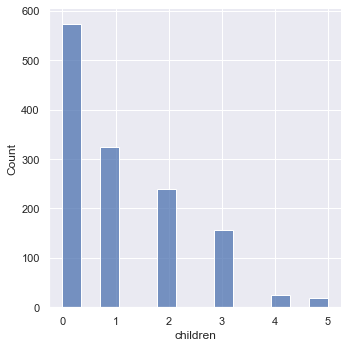

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['children'])
plt.show()

In [13]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 432x432 with 0 Axes>

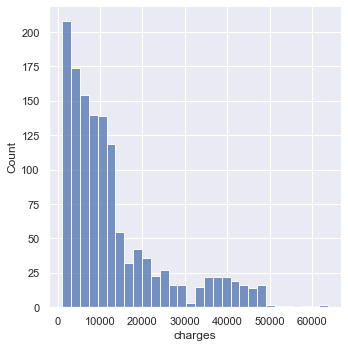

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['charges'])
plt.show()

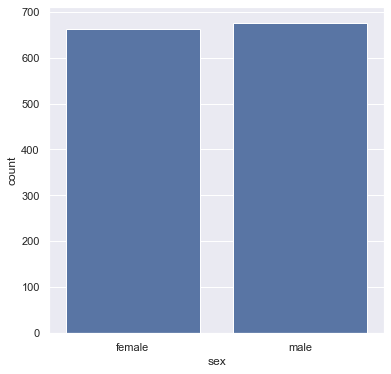

In [15]:
# column chart for catogorical column -sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['sex'],data=data)
plt.show()

In [19]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

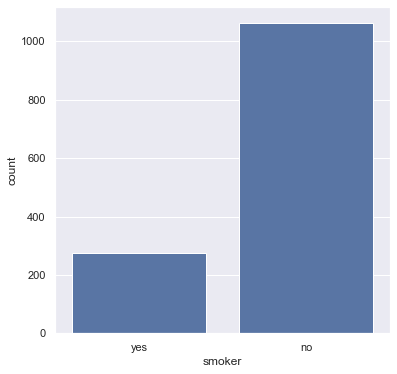

In [21]:
# column chart for catogorical column - smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['smoker'],data=data)
plt.show()

<AxesSubplot:xlabel='region', ylabel='count'>

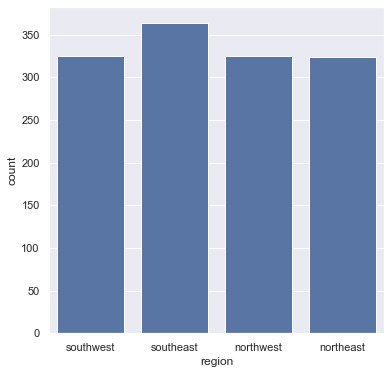

In [22]:
# column chart for catogorical column - smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data['region'],data=data)

In [23]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# convert to catogorical column to numerical column

data.replace({'sex':{'female':0,'male':1}},inplace=True)
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
data.replace({'region'{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [31]:
x = data.drop(columns='charges')
y = data['charges']

In [33]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

In [37]:
x.shape

(1338, 6)

In [38]:
# create the model

model = RandomForestRegressor(n_estimators=100,max_depth=7)

In [39]:
#Training the model
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=7)

In [41]:
# prediction value with test data

test_predict = model.predict(x_test)
test_predict

array([ 2880.58024965, 15154.31679206, 15833.47181007,  7532.4638663 ,
       11799.83924609, 12163.52444009,  9758.41677691, 24036.9923772 ,
        7531.94527307, 23495.49640157, 13768.40825864,  5308.62366992,
       11779.24717864, 12482.26781178, 12307.52348539, 10250.63755553,
        6210.45947108,  5782.23597372,  6791.02581435,  5544.29613834,
        3978.07494131, 14743.68060004,  6435.94956221, 13175.88730116,
       14871.57743539,  6710.45056445, 14396.11293066, 27942.08448769,
        8707.67828305,  2750.86542686, 14207.18943609, 38055.38810738,
        9508.74901436,  5744.09681196, 47385.06338557,  6261.7994708 ,
       14826.30588578, 13989.48485226, 20744.90049022,  5544.29613834,
       13335.51249371, 43428.3557299 , 10573.45313809,  9557.8591988 ,
       11882.94425795, 12466.22972391,  5548.75657445, 12535.22125061,
        4976.42126914,  8267.81922823,  3231.65040807,  9635.38953891,
        1796.69675633, 27411.8087059 , 47371.57905396,  9893.2545839 ,
      

In [42]:
# model evaluation 

from sklearn.metrics import r2_score

In [43]:
r2_score(test_predict,y_test)

0.8478049516841071

In [48]:
input_data = (19,0,27.9,0,1,1)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)

In [49]:
data_premium = model.predict(input_data_array)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [50]:
data_premium[0]

17148.794781185265

In [53]:
# save the model
import pickle as pkl
pkl.dump(model,open('MIPML.pkl','wb'))